<a href="https://colab.research.google.com/github/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data/blob/main/PPGBP_PPG_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import seaborn as sns
import io
import numpy as np #Library to manage arrays
import pandas as pd #Lirary for mange dataframes
import matplotlib.pyplot as plt # Library to make plots.
#Import csv into a dataframe
url = 'https://raw.githubusercontent.com/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data/refs/heads/main/PPG-BP%20dataset.csv'
df = pd.read_csv(url)
print("Complete Data shape:", df.shape)
print("Data shape withput NA values",df.dropna().shape)

Complete Data shape: (219, 14)
Data shape withput NA values (0, 14)


In [5]:
columns_na = df.isnull().sum(axis = 0)
pd.set_option('display.max_rows', None)
columns_na

,0
Num.,0
subject_ID,0
Sex(M/F),0
Age(year),0
Height(cm),0
Weight(kg),0
Systolic Blood Pressure(mmHg),0
Diastolic Blood Pressure(mmHg),0
Heart Rate(b/m),0
BMI(kg/m^2),0


In [6]:
df.describe()

,Num.,subject_ID,Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2)
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,110.000000,156.598174,57.168950,161.228311,60.191781,127.945205,71.849315,73.639269,23.107215
std,63.364028,101.604347,15.874327,8.202871,11.886301,20.377779,11.111203,10.738874,4.004302
min,1.000000,2.000000,21.000000,145.000000,36.000000,80.000000,42.000000,52.000000,14.690000
25%,55.500000,85.500000,48.000000,155.000000,52.500000,113.500000,64.000000,66.000000,20.550000
50%,110.000000,152.000000,58.000000,160.000000,60.000000,126.000000,70.000000,73.000000,22.600000
75%,164.500000,214.500000,67.500000,167.000000,66.500000,139.000000,78.000000,80.000000,25.000000
max,219.000000,419.000000,86.000000,196.000000,103.000000,182.000000,107.000000,106.000000,37.460000


Text(0, 0.5, 'Counts')

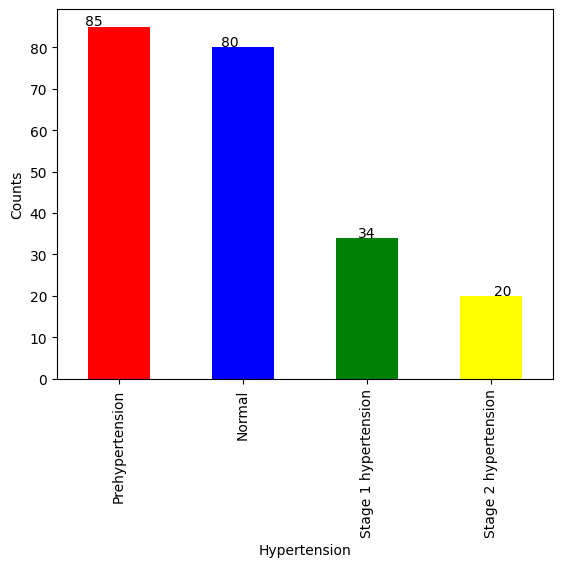

In [7]:
classes = df['Hypertension'].value_counts()
ax = classes.plot.bar(rot = 90, color=["red", "blue", "green","yellow"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.1, p.get_height() * 1.005))
ax.set_ylabel("Counts")

Drop columns that re not relevant such as

In [8]:
df_ch3 =  df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease'], axis =1)
df_ch3.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,Female,24,155,38,96,67,82,15.82,Normal
1,Male,58,168,45,116,60,78,15.94,Normal
2,Female,58,160,42,111,65,67,16.41,Normal
3,Female,30,161,44,105,70,85,16.97,Normal
4,Male,67,159,43,116,61,80,17.01,Normal


Correlation map

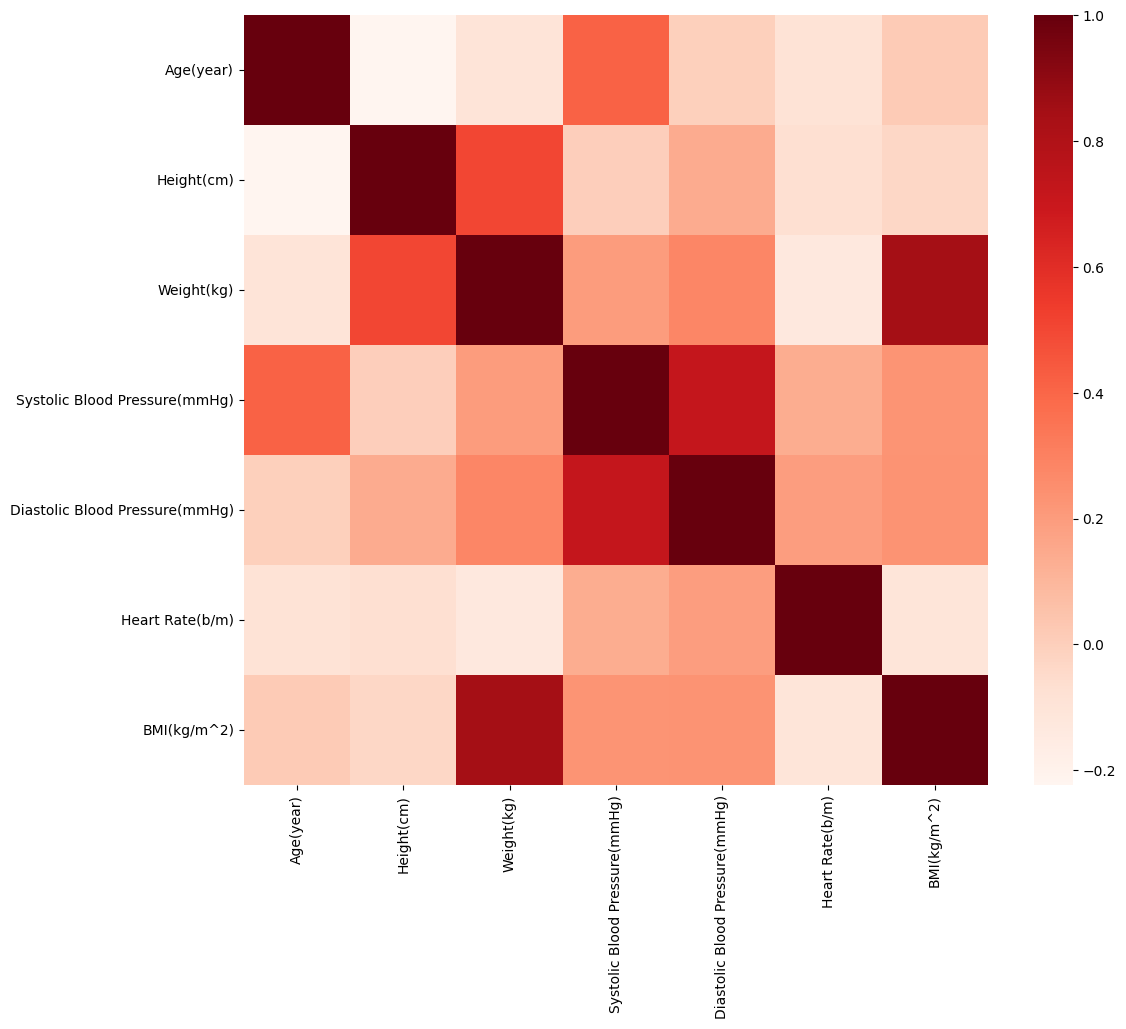

In [9]:
df_ch4 = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease','Hypertension', "Sex(M/F)"], axis =1)
plt.figure(figsize=(12,10))
df_corr = df_ch4.corr()
sns.heatmap(df_corr, annot=False, cmap=plt.cm.Reds)
plt.show()

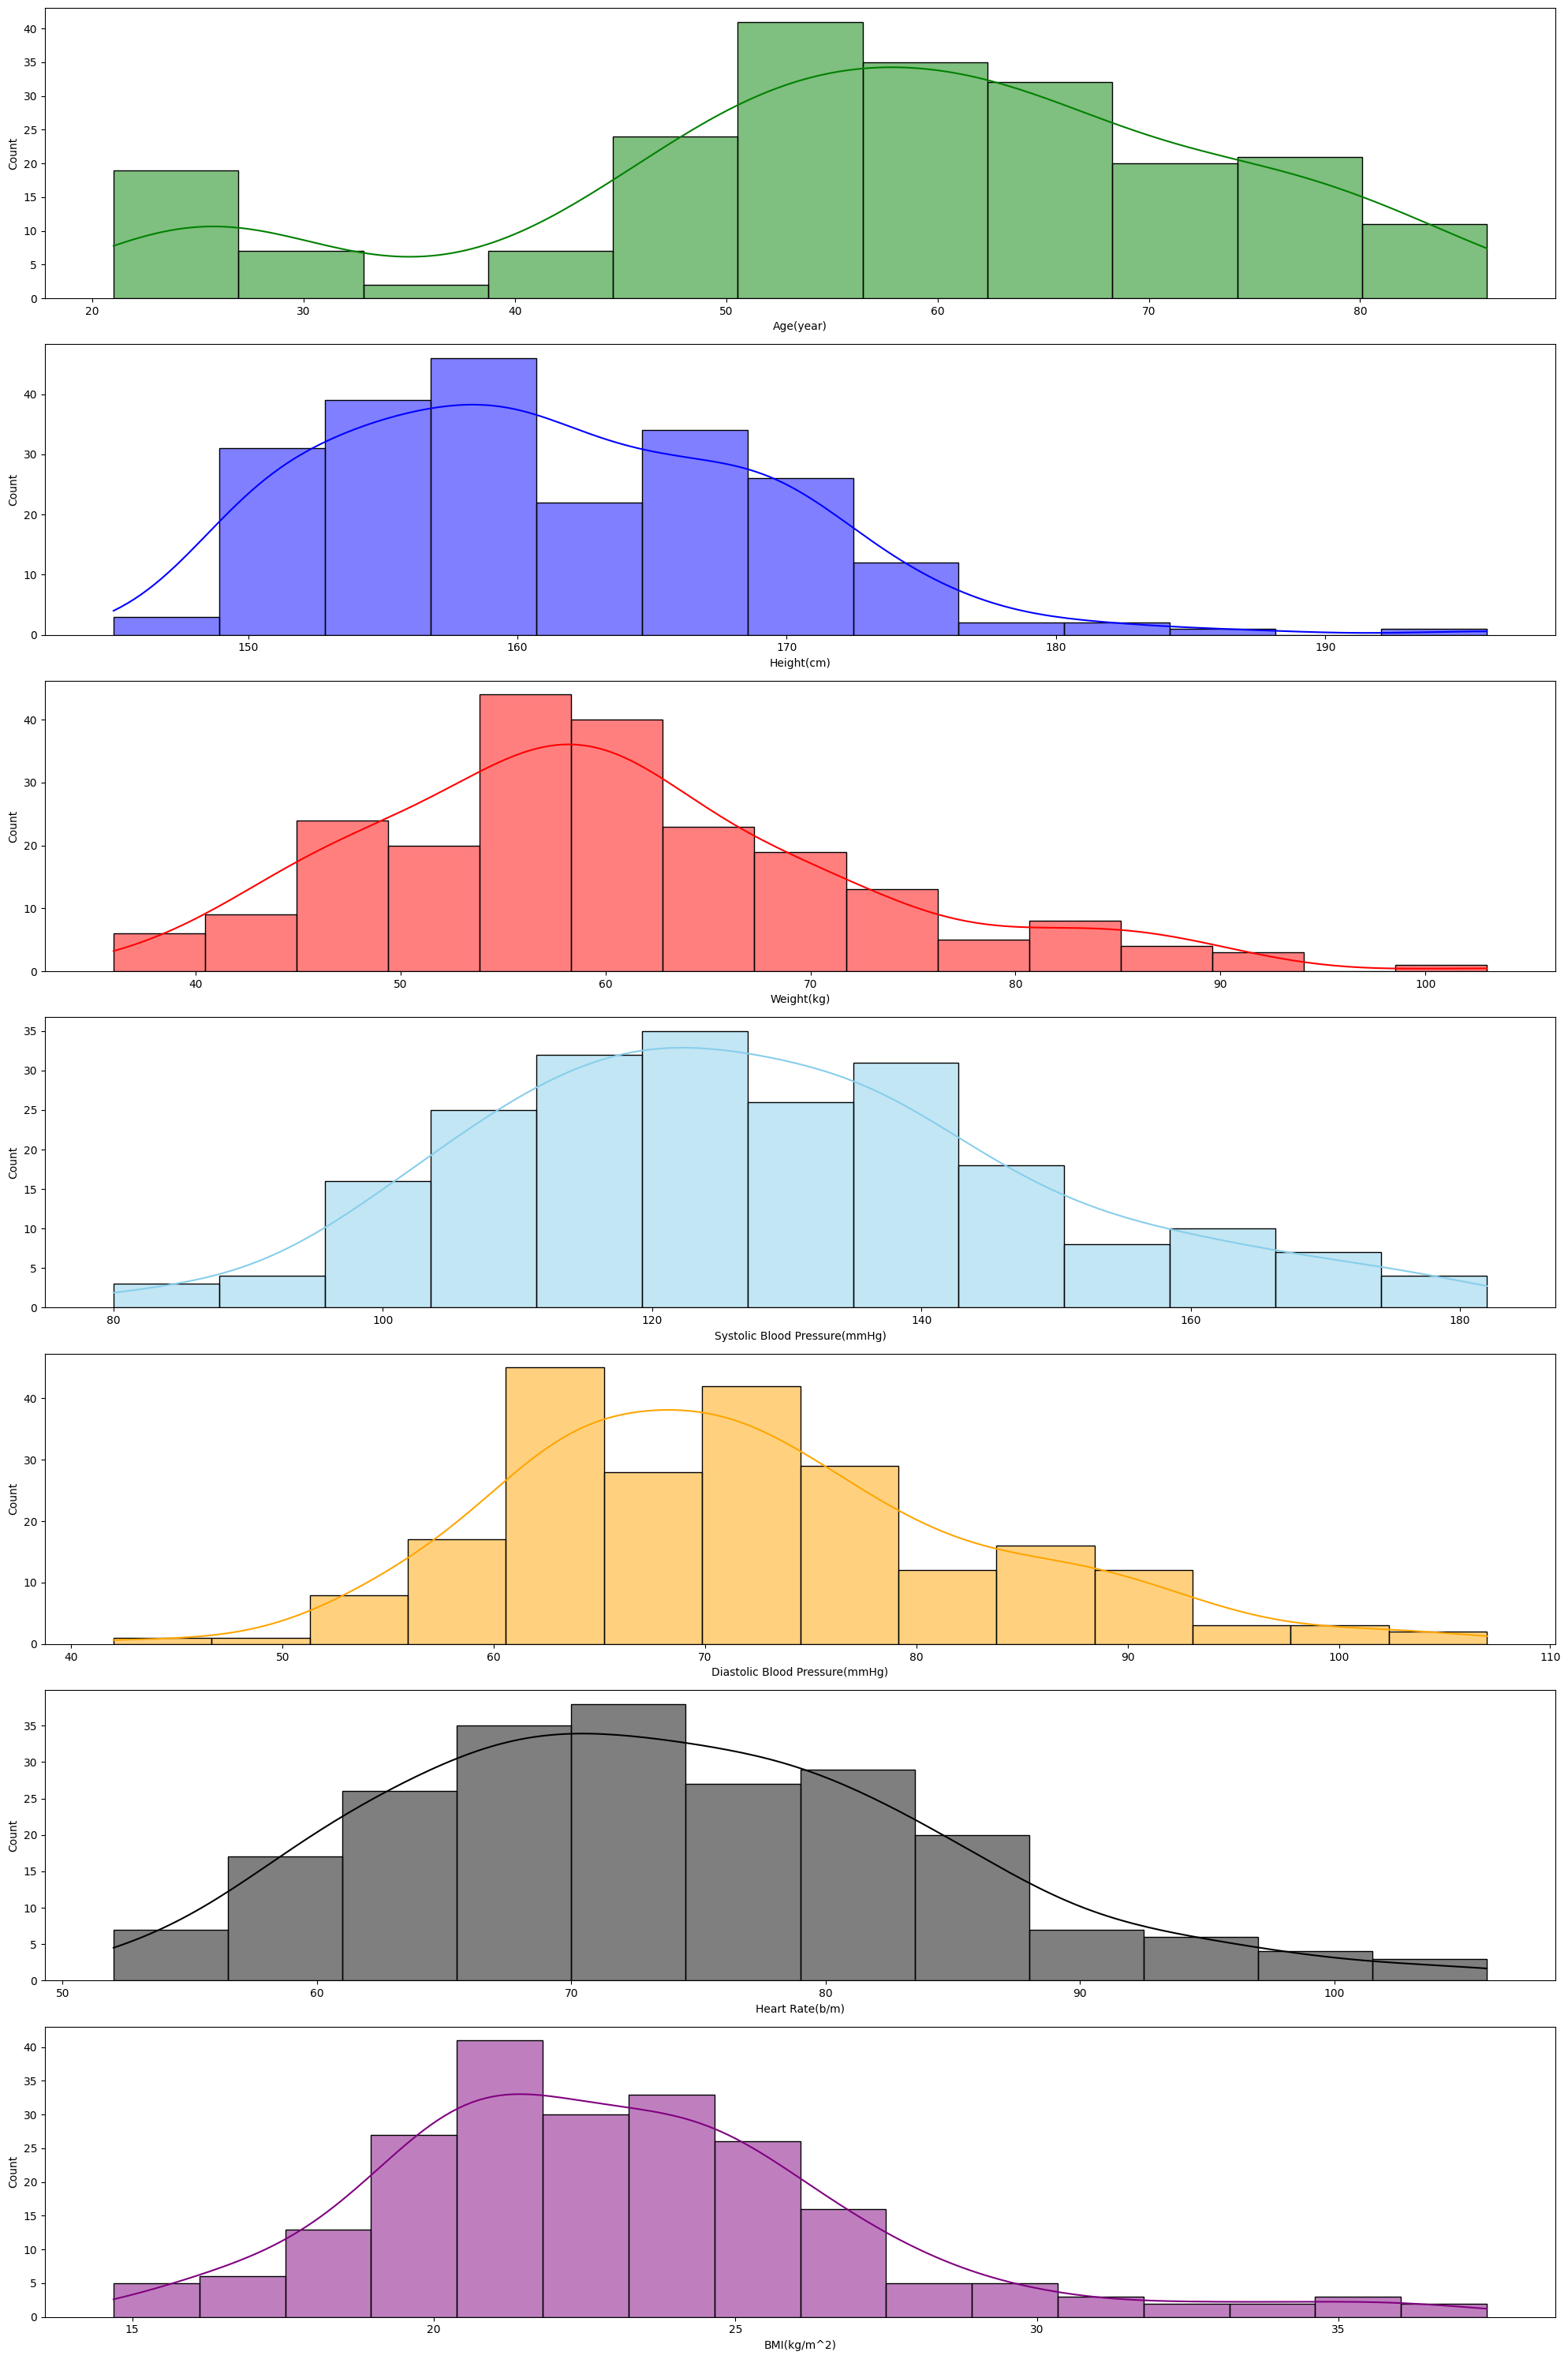

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt  # You need to import plt explicitly

c = ["green", "blue", "red", "skyblue", "orange", "black", "purple"]
f, axes = plt.subplots(7, 1, figsize=(20, 30), sharex=False)

for i, (ax, feature) in enumerate(zip(axes.flat, df_ch4.columns)):
    # sns.distplot is deprecated; use sns.histplot or sns.kdeplot instead
    sns.histplot(df_ch4[feature], color=c[i], ax=ax, kde=True)
    ax.set_xlabel(feature)  # Set x-axis label

plt.tight_layout()  # Adjust subplot spacing
plt.show()

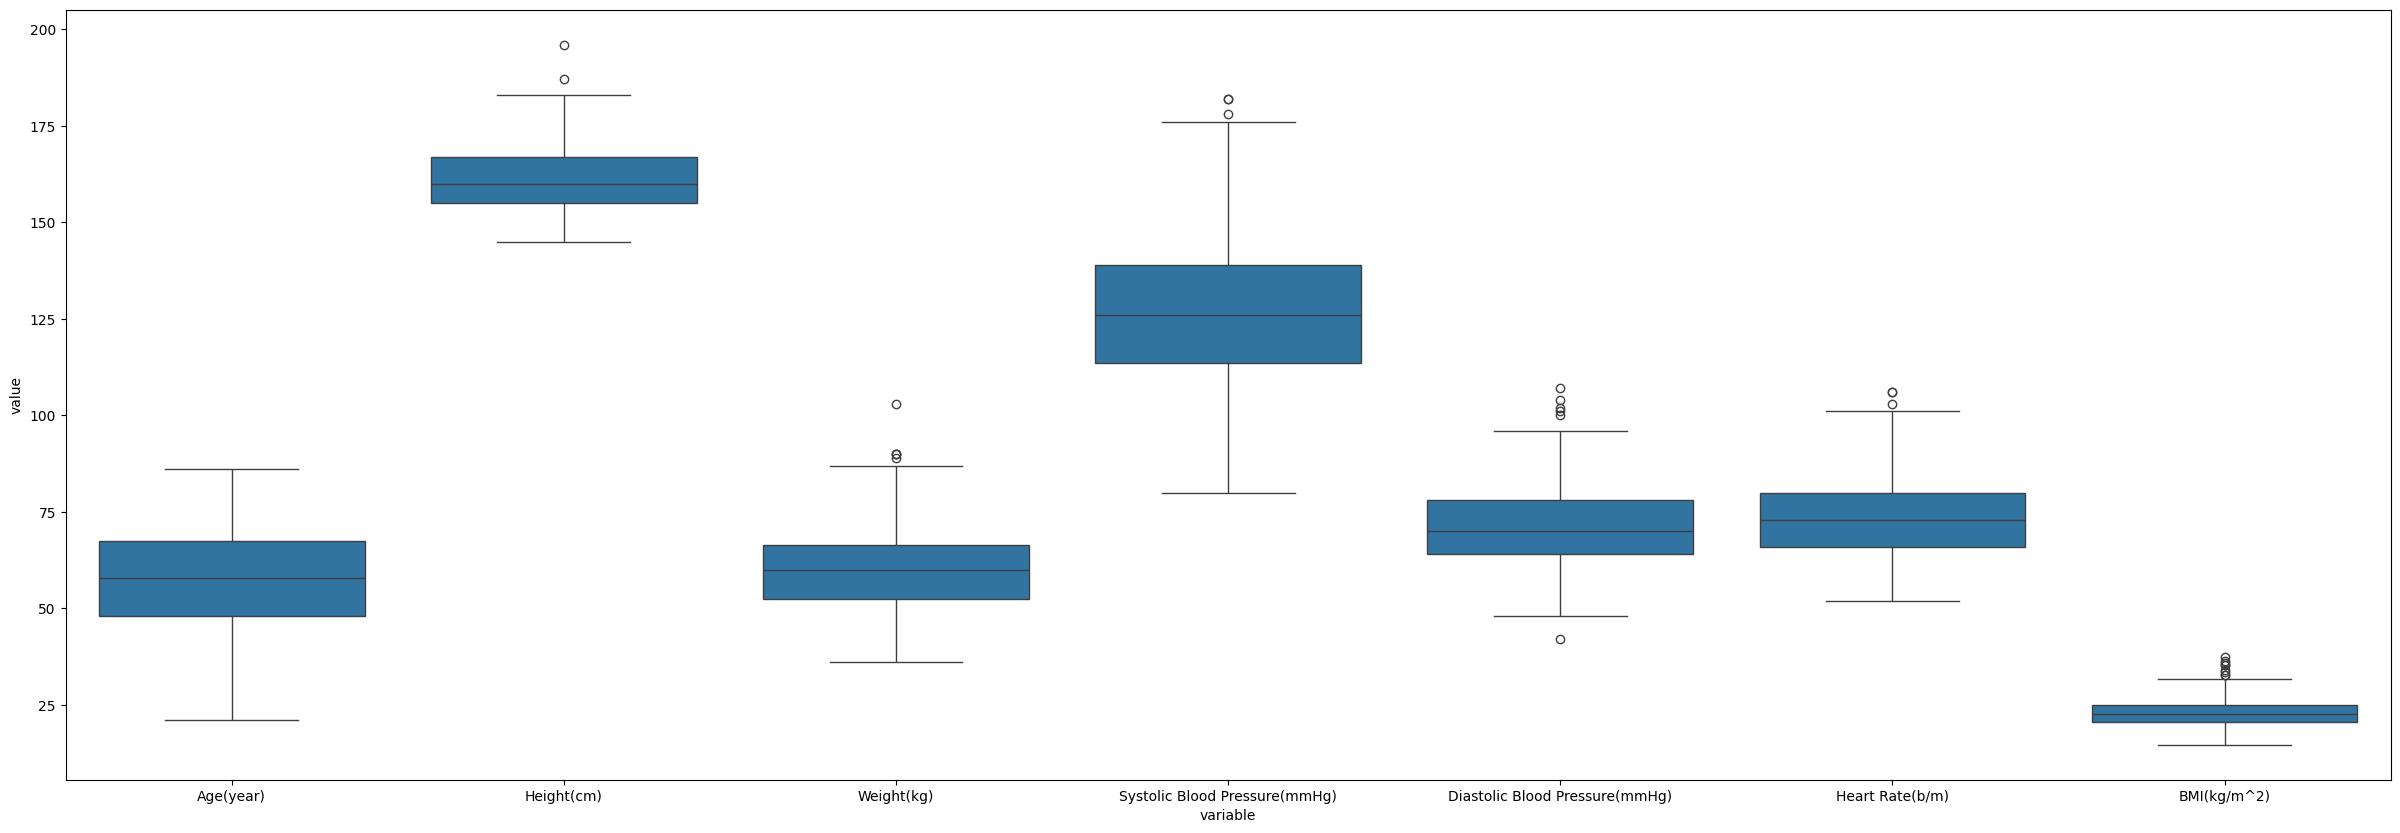

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(30, 10))  # Set figure size for this plot only
sns.boxplot(x="variable", y="value", data=pd.melt(df_ch4))
plt.show()

In [12]:
df_ch3.describe().to_csv("my_description.csv")

In [13]:
df_n = df.drop(['Num.', 'subject_ID', 'cerebral infarction', 'Diabetes', 'cerebrovascular disease','Systolic Blood Pressure(mmHg)','Diastolic Blood Pressure(mmHg)'], axis=1)

In [14]:
df_n.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,Female,24,155,38,82,15.82,Normal
1,Male,58,168,45,78,15.94,Normal
2,Female,58,160,42,67,16.41,Normal
3,Female,30,161,44,85,16.97,Normal
4,Male,67,159,43,80,17.01,Normal


In [15]:
df_n['Sex(M/F)'] = df_n["Sex(M/F)"].astype('category').cat.codes
df_filtered =  df_n
# Select input variables and separate target variable
features = df_filtered.loc[:,  df_n.columns != 'Hypertension']
print(features.shape)

(219, 6)


In [16]:
df1 = df[['subject_ID']]
from scipy.stats import skew

In [17]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data/refs/heads/main/SQI_index.csv'
df_sqi = pd.read_csv(url)

In [19]:
from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
final_sqi = []
for i in range(0,219):
  for j in range(0,219):
    if df1.values[i,0] == df_sqi.values[j,0]:
      #print(df1.values[i,0],df_sqi.values[j,1])
      final_sqi.append(str(df1.values[i,0])+"_"+str(df_sqi.values[j,1]))
print(final_sqi)

['407_1', '124_2', '222_1', '66_3', '131_1', '405_3', '409_2', '403_3', '167_2', '126_3', '65_2', '164_1', '419_1', '53_2', '416_3', '119_2', '229_2', '414_3', '404_1', '179_1', '58_1', '13_3', '116_3', '161_1', '176_1', '23_3', '173_3', '40_2', '149_2', '411_1', '107_1', '41_1', '412_3', '6_3', '14_1', '410_1', '127_2', '418_3', '185_3', '67_3', '24_3', '145_1', '247_1', '415_2', '190_1', '84_1', '165_1', '32_3', '52_1', '211_1', '63_1', '56_3', '182_2', '200_3', '60_2', '413_1', '235_2', '256_3', '17_3', '62_2', '98_2', '158_2', '27_1', '89_2', '61_3', '224_2', '248_3', '91_1', '230_3', '406_3', '148_3', '246_2', '163_1', '172_2', '12_2', '19_1', '18_3', '191_1', '152_3', '115_3', '134_3', '196_1', '57_1', '417_3', '137_3', '215_3', '259_3', '103_3', '226_2', '123_3', '156_2', '153_2', '22_1', '209_1', '64_2', '214_2', '114_3', '160_2', '47_1', '166_2', '237_3', '244_2', '29_1', '99_1', '245_3', '254_2', '11_1', '34_1', '110_1', '180_3', '113_3', '122_1', '186_3', '192_2', '141_1', '

In [20]:
data_ppg = np.zeros((219,2100))
data_ppg.shape

(219, 2100)

In [22]:
import zipfile
import requests
import io

# Replace with the repository's ZIP URL
zip_url = "https://github.com/ErickAxelMartinezRios/Elevated-Blood-Pressure-Detection-based-on-PPG-data/raw/main/0_subject.zip"

# Download the ZIP file
response = requests.get(zip_url)

# Unzip it
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("repo_folder")  # Folder where it will be extracted

In [24]:
for i in range(219):
  with open('/content/repo_folder/0_subject/' + str(final_sqi[i]) +'.txt' , 'r') as f:
    lines = f.readlines()
    x = [line.split() for line in lines]
    ppg = [float(k) for k in x[:][0]]
    data_ppg[i,:] = ppg[0:2100]

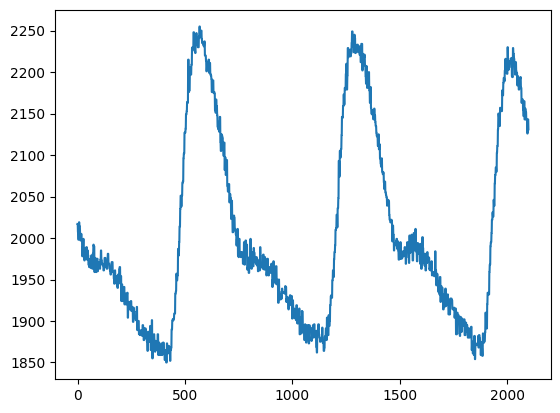

In [25]:
plt.plot(data_ppg[70])

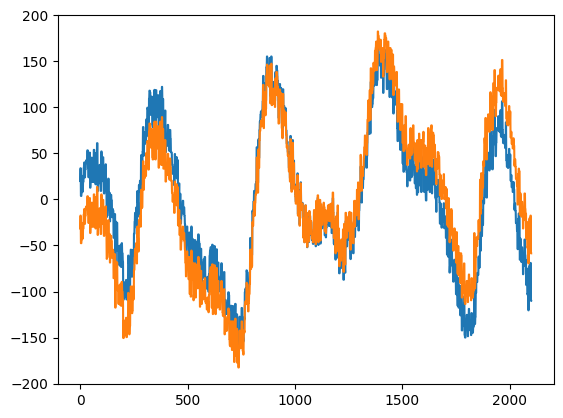

In [26]:
from scipy import signal
plt.plot(signal.detrend(data_ppg[51], type= 'linear'))
plt.plot(data_ppg[51]- np.mean(data_ppg[51]))

[Text(0.5, 0, 'Samples')]

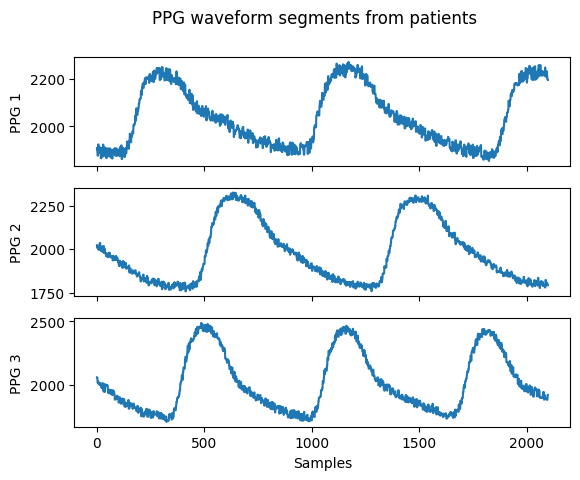

In [27]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg[15])
axs[1].plot(data_ppg[90])
axs[2].plot(data_ppg[218])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

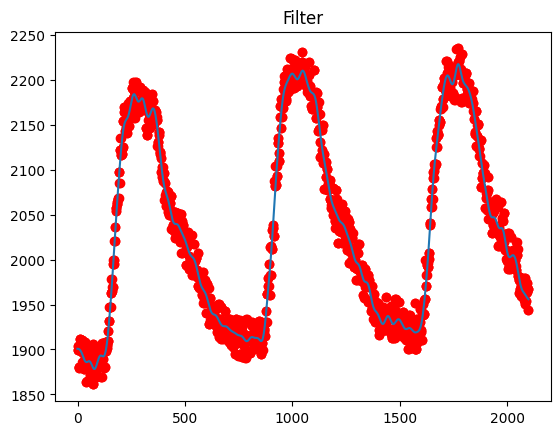

In [28]:
from scipy import signal
sig = data_ppg[85]
plt.plot(sig, 'ro')
plt.title('Filter')
sos = signal.butter(6, 25, 'lowpass', fs=1000, output='sos')
filtered = signal.sosfiltfilt(sos, sig)
plt.plot(filtered)
plt.show()

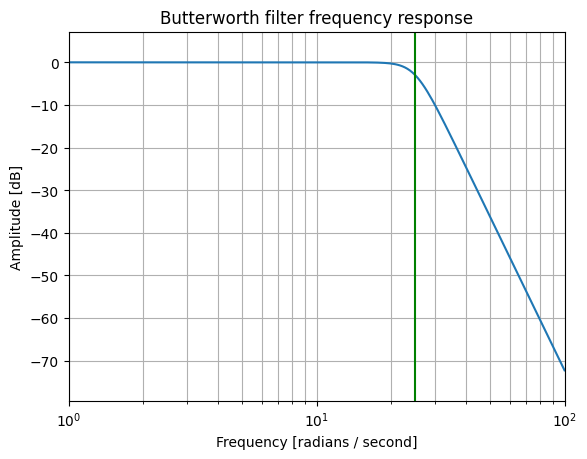

In [29]:
b, a = signal.butter(6, 25, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(25, color='green') # cutoff frequency
plt.show()

In [30]:
data_ppg_filtered = np.zeros((219,2100))
data_ppg_filtered.shape

(219, 2100)

In [31]:
for ii in range(0,len(data_ppg)):
  sig_raw = data_ppg[ii]
  sig_trend = signal.detrend(sig_raw, type= 'linear')
  filtered_temp = signal.sosfiltfilt(sos, sig_raw)
  data_ppg_filtered[ii,:] = filtered_temp

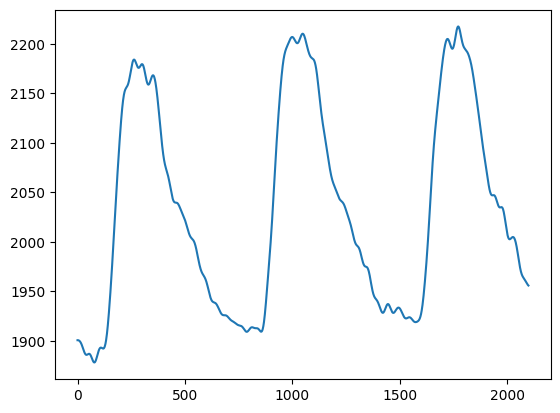

In [32]:
plt.plot(data_ppg_filtered[85])

[Text(0.5, 0, 'Samples')]

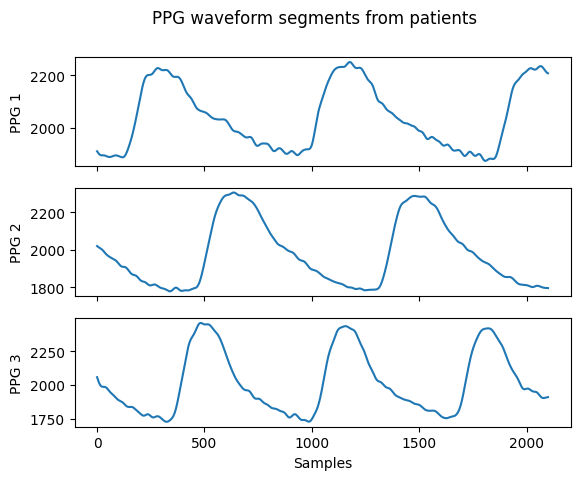

In [33]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg_filtered[15])
axs[1].plot(data_ppg_filtered[90])
axs[2].plot(data_ppg_filtered[218])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

In [34]:
data_ppg_norm = np.zeros((219,2100))
data_ppg_norm.shape

(219, 2100)

In [36]:
from scipy import stats
for jj in range(0,len(data_ppg_filtered)):
  sig_ = data_ppg_filtered[jj]
  ppg_norm = stats.zscore(sig_)
  data_ppg_norm[jj,:] = ppg_norm

[Text(0.5, 0, 'Samples')]

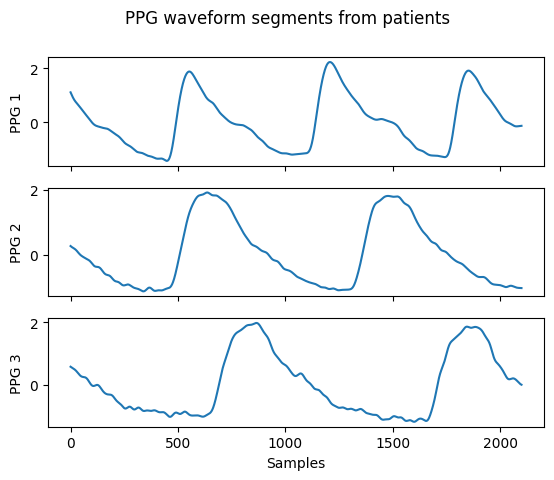

In [37]:
fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PPG waveform segments from patients')
axs[0].plot(data_ppg_norm[5])
axs[1].plot(data_ppg_norm[90])
axs[2].plot(data_ppg_norm[200])
labels = ['PPG 1', 'PPG 2', 'PPG 3']
i=0
for ax in axs.flat:
  ax.set(ylabel=labels[i])
  i = i+1
ax.set(xlabel='Samples')

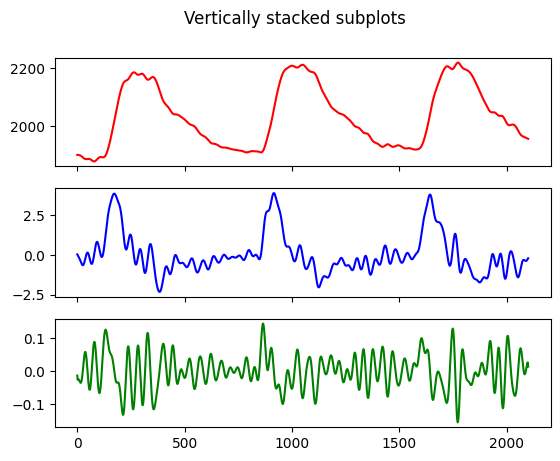

In [38]:
fig, axs = plt.subplots(3,sharex=True)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(filtered,'r')
axs[1].plot(np.gradient(filtered),'b')
axs[2].plot(np.gradient(np.gradient(filtered)),'g')

PPG_acceleration

In [39]:
data_ppg_acc = np.zeros((219,2100))
data_ppg_acc.shape

(219, 2100)

In [40]:
for acc in range(0,len(data_ppg_norm)):
  acc_ = data_ppg_norm[acc]
  ppg_acc = np.gradient(np.gradient(acc_))
  data_ppg_acc[acc,:] = ppg_acc

PPG_velocity

In [41]:
data_ppg_v = np.zeros((219,2100))
data_ppg_v.shape

(219, 2100)

In [42]:
for vcc in range(0,len(data_ppg_norm)):
  vcc_ = data_ppg_norm[vcc]
  ppg_vcc = np.gradient(vcc_)
  data_ppg_v[vcc,:] = ppg_vcc

Wavelet Scattering

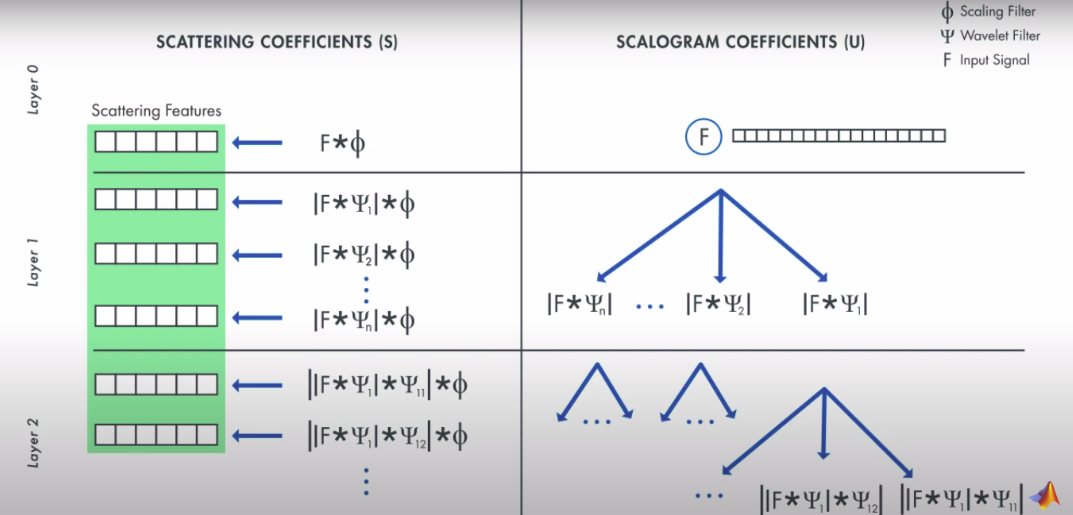

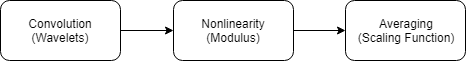

**Intall Kymatio**

In [43]:
pip install kymatio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 1.9 MB/s eta 0:00:00


Text(0.5, 0, 'Samples')

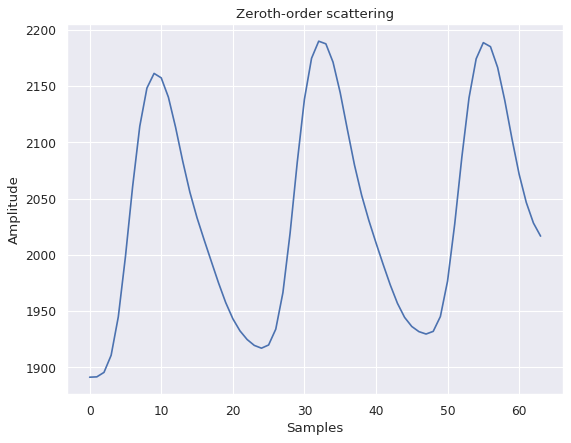

In [44]:
from kymatio.numpy import Scattering1D
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
sns.set(font_scale=1)
T = 2048
J = 5
Q = 1
scattering = Scattering1D(J, T, Q)
Sx = scattering(data_ppg_filtered[85][0:2048])
meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.ylabel('Amplitude')
plt.xlabel('Samples')

Text(0.5, 0, 'Samples')

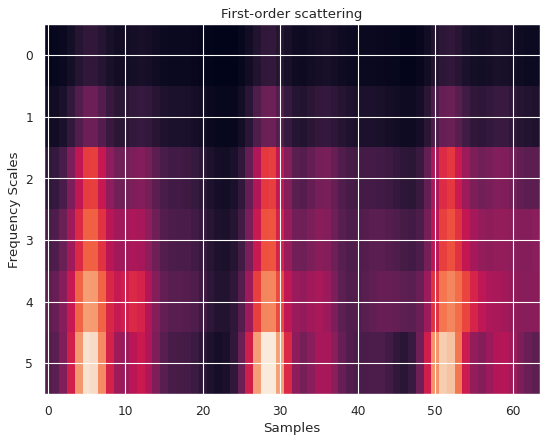

In [45]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')
plt.title('First-order scattering')
plt.ylabel('Frequency Scales')
plt.xlabel('Samples')

Text(0.5, 0, 'Samples')

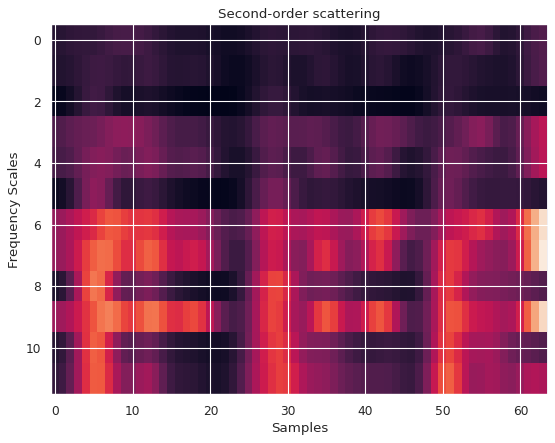

In [46]:
figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')
plt.ylabel('Frequency Scales')
plt.xlabel('Samples')

(219, 19, 64)
(219, 19)


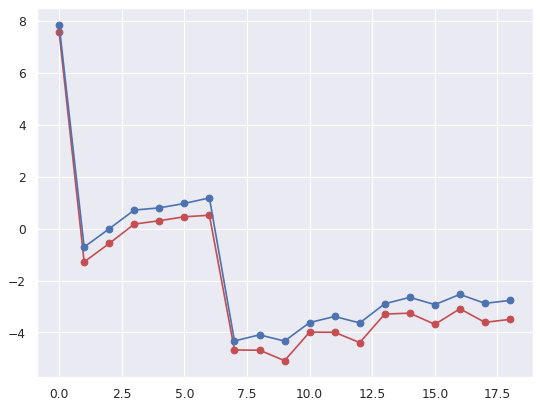

In [48]:
figure(figsize=(8, 6), dpi=80)
Sx_all = scattering(data_ppg_filtered[:,0:2048])
print(Sx_all.shape)
log_eps = 1e-6
Sx_all = Sx_all[:,0:,:]
Sx_all = np.log(np.abs(Sx_all) + log_eps)
Sx_all = np.mean(Sx_all, axis=2)
print(Sx_all.shape)
plt.plot(Sx_all[1], 'r-o')
plt.plot(Sx_all[5], 'b-o')
plt.grid("on")

In [49]:
box_df = pd.DataFrame(Sx_all[0:165])
classes = df_filtered.loc[:,['Hypertension']].values[0:165].T[0]
box_df['Hypertension Class'] = classes.tolist()

In [50]:
box_df.shape

(165, 20)

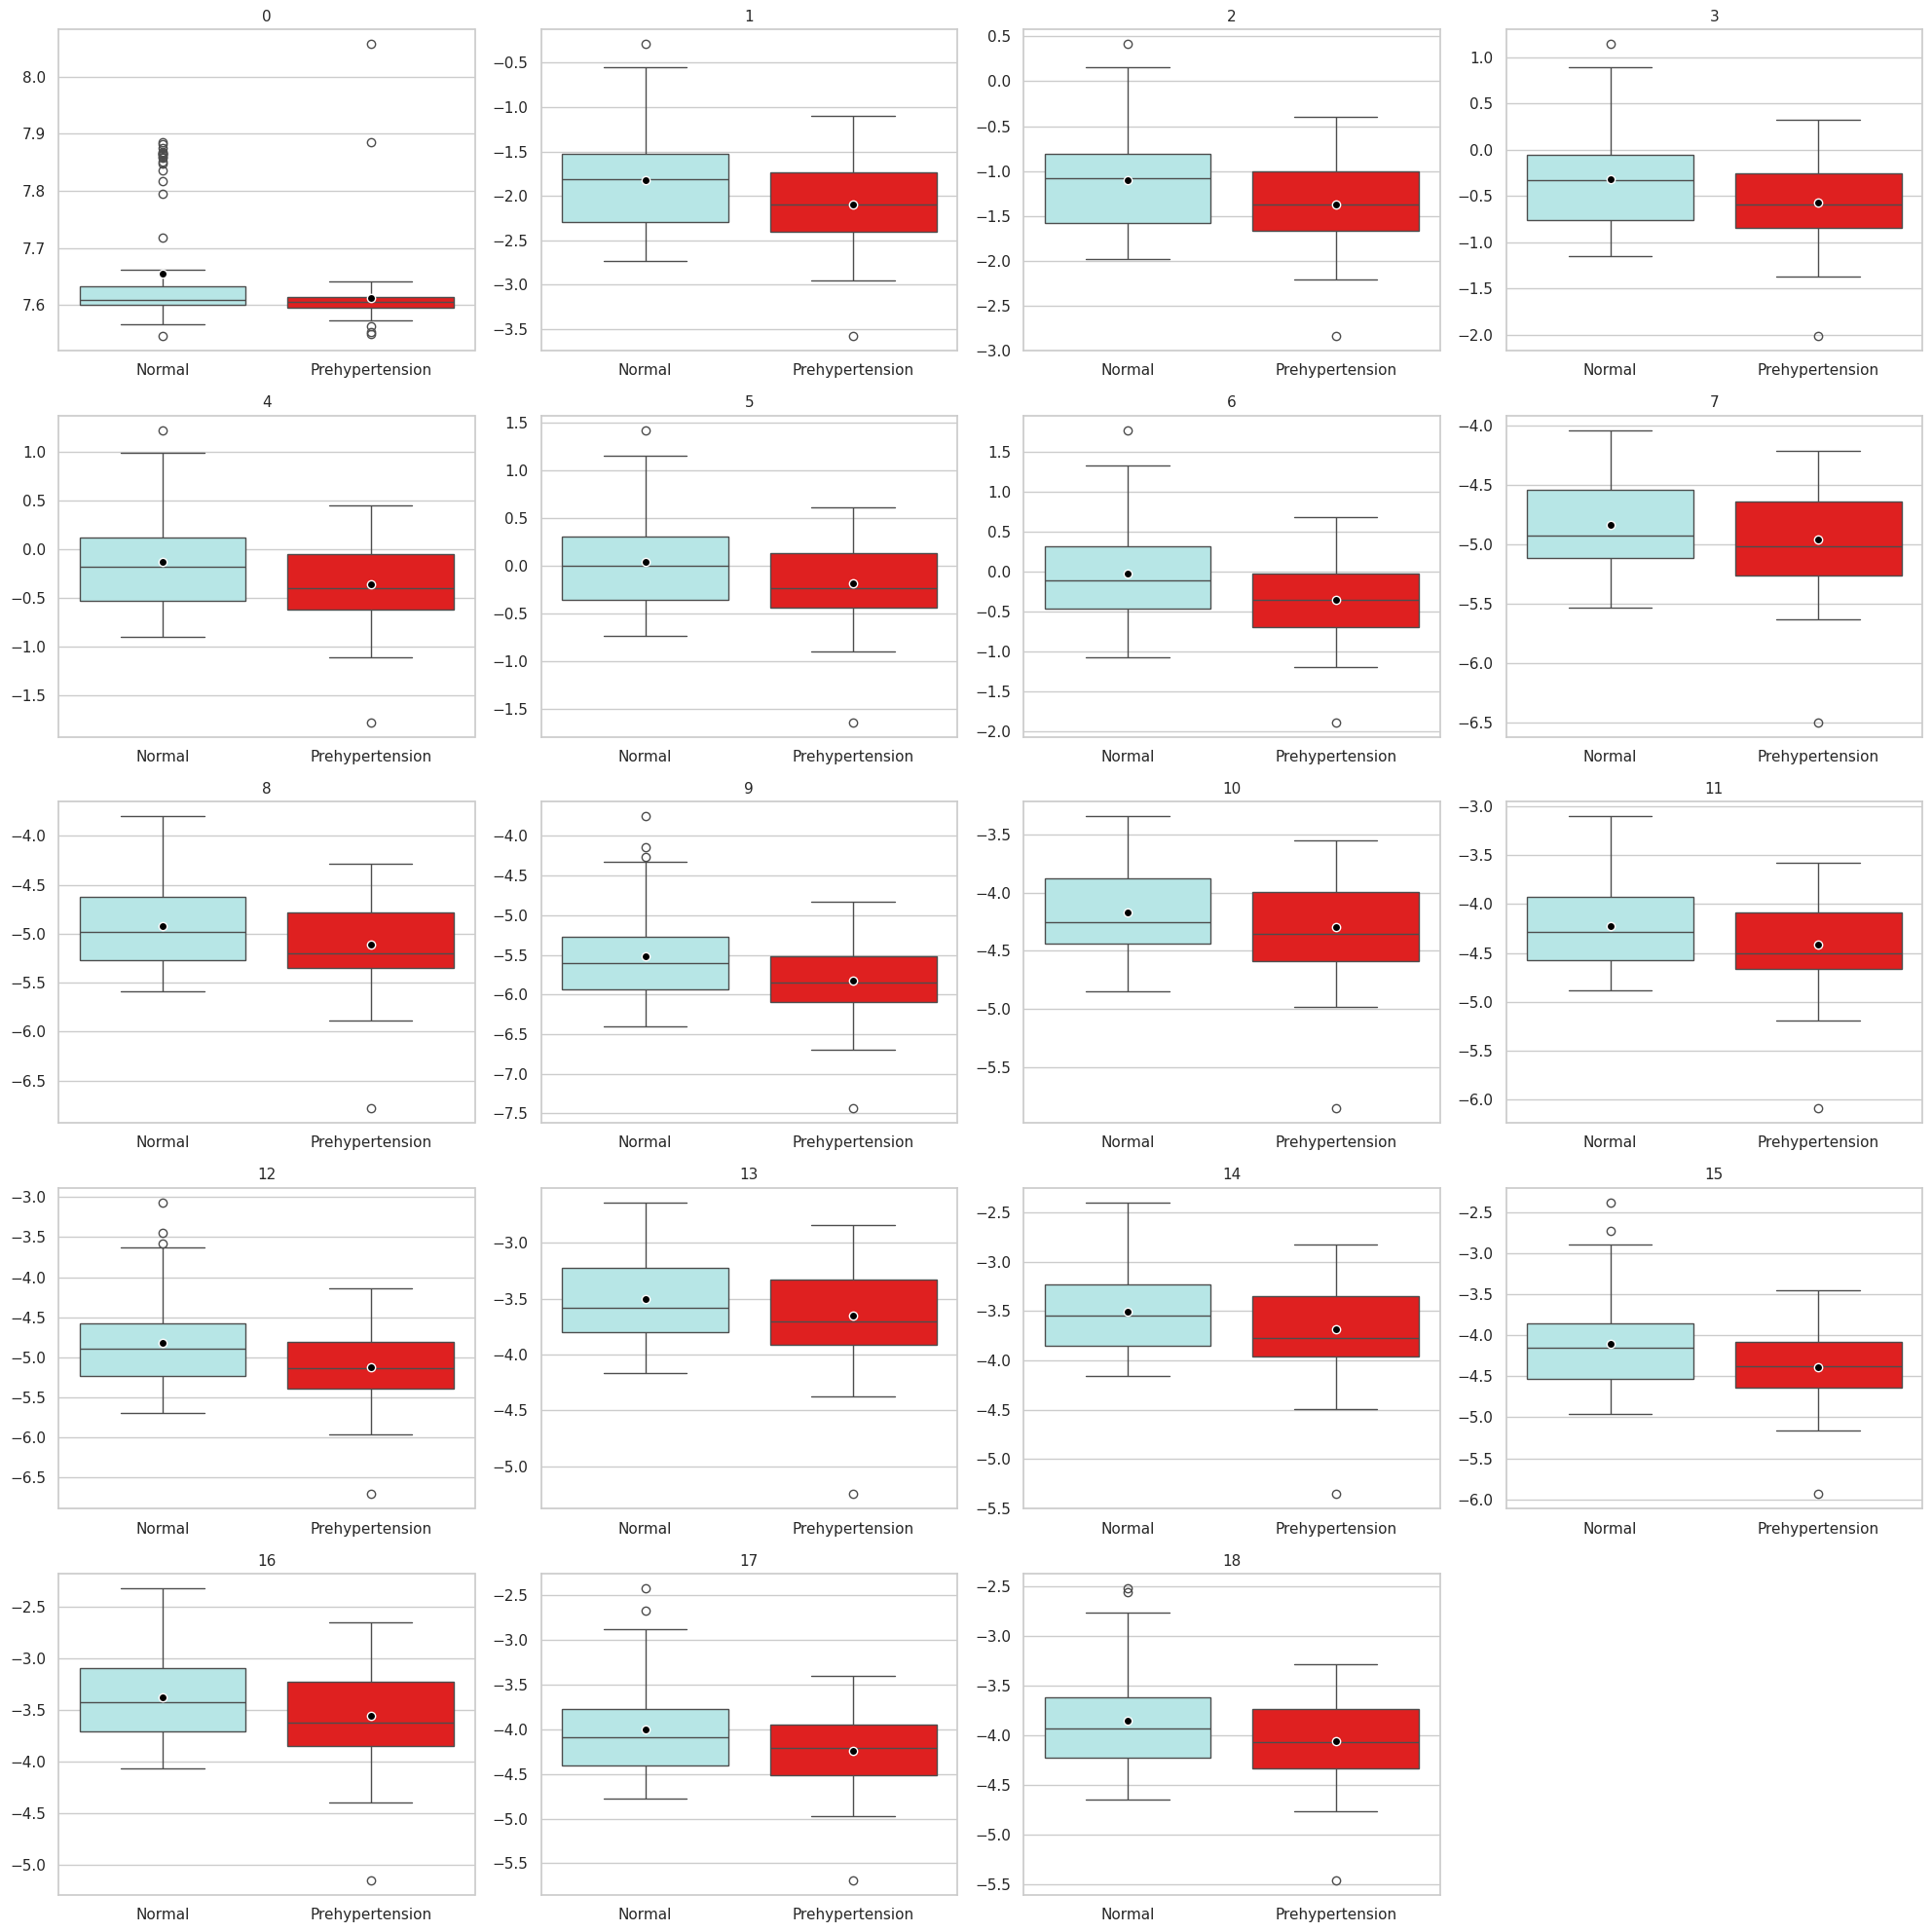

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1)

# Determine subplot grid size
n_features = 19
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten to make indexing easy

for i in range(n_features):
    feature = box_df.columns[i]
    ax = axes[i]

    sns.boxplot(
        x="Hypertension Class",
        y=feature,
        hue="Hypertension Class",       # Explicit hue to fix deprecation warning
        data=box_df,
        palette=['paleturquoise', 'red'],
        showmeans=True,
        meanprops={
            "marker": "o",
            "markeredgecolor": "white",
            "markerfacecolor": "black",
            "markersize": 6
        },
        legend=False,
        ax=ax
    )
    ax.set_title(feature, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove unused axes (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [53]:
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Split data into groups
normal_0 = box_df[0][0:80]
pre_0 = box_df[0][80:165]

# --- T-test (Welch's) ---
ttest_res = stats.ttest_ind(a=normal_0, b=pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest_res.statistic:.4f}, p-value = {ttest_res.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0, ddof=1):.4f}, Std  (Pre) = {np.std(pre_0, ddof=1):.4f}")
print()

# --- Mann-Whitney U test ---
U1, p = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z = (U2 - mean_U) / std_U
p_two_tailed = 2 * stats.norm.cdf(z)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z = {z:.4f}, Two-tailed normal approximation p = {p_two_tailed:.4f}")


Welch's t-test:
t-statistic = 3.2860, p-value = 0.0013
Mean (Normal) = 7.6543, Mean (Pre) = 7.6117
Std  (Normal) = 0.1002, Std  (Pre) = 0.0600

Mann–Whitney U test:
U1 = 4177.0, U2 = 2623.0, p-value = 0.0113
Median (Normal) = 7.6082, Median (Pre) = 7.6044
Z = -2.5334, Two-tailed normal approximation p = 0.0113


In [54]:
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Extract data from box_df[1]
normal_0 = box_df[1][0:80]
pre_0 = box_df[1][80:165]

# --- Welch's t-test ---
ttest = stats.ttest_ind(normal_0, pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest.statistic:.4f}, p-value = {ttest.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0, ddof=1):.4f}, Std (Pre) = {np.std(pre_0, ddof=1):.4f}")
print()

# --- Mann–Whitney U test ---
U1, p_value = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z_score = (U2 - mean_U) / std_U
normal_approx_p = 2 * stats.norm.cdf(z_score)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p_value:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z-score = {z_score:.4f}, Normal approximation p = {normal_approx_p:.4f}")

Welch's t-test:
t-statistic = 3.4112, p-value = 0.0008
Mean (Normal) = -1.8229, Mean (Pre) = -2.1006
Std  (Normal) = 0.5758, Std (Pre) = 0.4594

Mann–Whitney U test:
U1 = 4230.0, U2 = 2570.0, p-value = 0.0068
Median (Normal) = -1.8077, Median (Pre) = -2.0974
Z-score = -2.7062, Normal approximation p = 0.0068


In [56]:
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Extract data from box_df[2]
normal_0 = box_df[2][0:80]
pre_0 = box_df[2][80:165]

# --- Welch's t-test ---
ttest = stats.ttest_ind(normal_0, pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest.statistic:.4f}, p-value = {ttest.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0):.4f}, Std (Pre) = {np.std(pre_0):.4f}")
print()

# --- Mann–Whitney U test ---
U1, p_value = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z_score = (U2 - mean_U) / std_U
normal_approx_p = 2 * stats.norm.cdf(z_score)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p_value:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z-score = {z_score:.4f}, Normal approximation p = {normal_approx_p:.4f}")

Welch's t-test:
t-statistic = 3.3923, p-value = 0.0009
Mean (Normal) = -1.0980, Mean (Pre) = -1.3697
Std  (Normal) = 0.5627, Std (Pre) = 0.4494

Mann–Whitney U test:
U1 = 4214.0, U2 = 2586.0, p-value = 0.0080
Median (Normal) = -1.0817, Median (Pre) = -1.3745
Z-score = -2.6540, Normal approximation p = 0.0080


In [57]:
# Extract data from box_df[3]
normal_0 = box_df[3][0:80]
pre_0 = box_df[3][80:165]

# --- Welch's t-test ---
ttest = stats.ttest_ind(normal_0, pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest.statistic:.4f}, p-value = {ttest.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0):.4f}, Std (Pre) = {np.std(pre_0):.4f}")
print()

# --- Mann–Whitney U test ---
U1, p_value = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z_score = (U2 - mean_U) / std_U
normal_approx_p = 2 * stats.norm.cdf(z_score)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p_value:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z-score = {z_score:.4f}, Normal approximation p = {normal_approx_p:.4f}")

Welch's t-test:
t-statistic = 3.3364, p-value = 0.0011
Mean (Normal) = -0.3185, Mean (Pre) = -0.5748
Std  (Normal) = 0.5391, Std (Pre) = 0.4322

Mann–Whitney U test:
U1 = 4216.0, U2 = 2584.0, p-value = 0.0078
Median (Normal) = -0.3295, Median (Pre) = -0.5969
Z-score = -2.6606, Normal approximation p = 0.0078


In [58]:
# Extract data from box_df[4]
normal_0 = box_df[4][0:80]
pre_0 = box_df[4][80:165]

# --- Welch's t-test ---
ttest = stats.ttest_ind(normal_0, pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest.statistic:.4f}, p-value = {ttest.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0):.4f}, Std (Pre) = {np.std(pre_0):.4f}")
print()

# --- Mann–Whitney U test ---
U1, p_value = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z_score = (U2 - mean_U) / std_U
normal_approx_p = 2 * stats.norm.cdf(z_score)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p_value:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z-score = {z_score:.4f}, Normal approximation p = {normal_approx_p:.4f}")

Welch's t-test:
t-statistic = 3.2032, p-value = 0.0017
Mean (Normal) = -0.1273, Mean (Pre) = -0.3567
Std  (Normal) = 0.4995, Std (Pre) = 0.4068

Mann–Whitney U test:
U1 = 4176.0, U2 = 2624.0, p-value = 0.0115
Median (Normal) = -0.1763, Median (Pre) = -0.3971
Z-score = -2.5301, Normal approximation p = 0.0114


In [59]:
# Extract data from box_df[5]
normal_0 = box_df[5][0:80]
pre_0 = box_df[5][80:165]

# --- Welch's t-test ---
ttest = stats.ttest_ind(normal_0, pre_0, equal_var=False)
print("Welch's t-test:")
print(f"t-statistic = {ttest.statistic:.4f}, p-value = {ttest.pvalue:.4f}")
print(f"Mean (Normal) = {np.mean(normal_0):.4f}, Mean (Pre) = {np.mean(pre_0):.4f}")
print(f"Std  (Normal) = {np.std(normal_0):.4f}, Std (Pre) = {np.std(pre_0):.4f}")
print()

# --- Mann–Whitney U test ---
U1, p_value = mannwhitneyu(normal_0, pre_0, alternative='two-sided')
nx, ny = len(normal_0), len(pre_0)
U2 = nx * ny - U1
mean_U = nx * ny / 2
std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
z_score = (U2 - mean_U) / std_U
normal_approx_p = 2 * stats.norm.cdf(z_score)

print("Mann–Whitney U test:")
print(f"U1 = {U1}, U2 = {U2}, p-value = {p_value:.4f}")
print(f"Median (Normal) = {np.median(normal_0):.4f}, Median (Pre) = {np.median(pre_0):.4f}")
print(f"Z-score = {z_score:.4f}, Normal approximation p = {normal_approx_p:.4f}")

Welch's t-test:
t-statistic = 3.2582, p-value = 0.0014
Mean (Normal) = 0.0453, Mean (Pre) = -0.1862
Std  (Normal) = 0.4988, Std (Pre) = 0.3993

Mann–Whitney U test:
U1 = 4208.0, U2 = 2592.0, p-value = 0.0085
Median (Normal) = -0.0049, Median (Pre) = -0.2350
Z-score = -2.6345, Normal approximation p = 0.0084


In [62]:
from scipy import stats
from scipy.stats import mannwhitneyu
import numpy as np

# Number of features in box_df
num_features = 19

# Iterate over all features (assumed to be from index 0 to 18)
for i in range(num_features):
    normal = box_df[i][0:80]
    pre = box_df[i][80:165]

    # Welch's t-test
    ttest = stats.ttest_ind(normal, pre, equal_var=False)

    # Mann–Whitney U test
    U1, p_value = mannwhitneyu(normal, pre, alternative='two-sided')
    nx, ny = len(normal), len(pre)
    U2 = nx * ny - U1
    mean_U = nx * ny / 2
    std_U = np.sqrt(nx * ny * (nx + ny + 1) / 12)
    z_score = (U2 - mean_U) / std_U
    approx_p = 2 * stats.norm.cdf(z_score)

    print(f"\nFeature {i}")
    print("-------------")
    print("Welch's t-test:")
    print(f"  t = {ttest.statistic:.4f}, p = {ttest.pvalue:.4f}")
    print(f"  Mean (Normal) = {np.mean(normal):.4f}, Mean (Pre) = {np.mean(pre):.4f}")
    print(f"  Std  (Normal) = {np.std(normal):.4f}, Std  (Pre) = {np.std(pre):.4f}")

    print("Mann–Whitney U test:")
    print(f"  U1 = {U1}, U2 = {U2}, p = {p_value:.4f}")
    print(f"  Median (Normal) = {np.median(normal):.4f}, Median (Pre) = {np.median(pre):.4f}")
    print(f"  Z = {z_score:.4f}, Approx. p = {approx_p:.4f}")



Feature 0
-------------
Welch's t-test:
  t = 3.2860, p = 0.0013
  Mean (Normal) = 7.6543, Mean (Pre) = 7.6117
  Std  (Normal) = 0.0996, Std  (Pre) = 0.0597
Mann–Whitney U test:
  U1 = 4177.0, U2 = 2623.0, p = 0.0113
  Median (Normal) = 7.6082, Median (Pre) = 7.6044
  Z = -2.5334, Approx. p = 0.0113

Feature 1
-------------
Welch's t-test:
  t = 3.4112, p = 0.0008
  Mean (Normal) = -1.8229, Mean (Pre) = -2.1006
  Std  (Normal) = 0.5722, Std  (Pre) = 0.4567
Mann–Whitney U test:
  U1 = 4230.0, U2 = 2570.0, p = 0.0068
  Median (Normal) = -1.8077, Median (Pre) = -2.0974
  Z = -2.7062, Approx. p = 0.0068

Feature 2
-------------
Welch's t-test:
  t = 3.3923, p = 0.0009
  Mean (Normal) = -1.0980, Mean (Pre) = -1.3697
  Std  (Normal) = 0.5627, Std  (Pre) = 0.4494
Mann–Whitney U test:
  U1 = 4214.0, U2 = 2586.0, p = 0.0080
  Median (Normal) = -1.0817, Median (Pre) = -1.3745
  Z = -2.6540, Approx. p = 0.0080

Feature 3
-------------
Welch's t-test:
  t = 3.3364, p = 0.0011
  Mean (Normal) = -0

(0.0, 0.6)

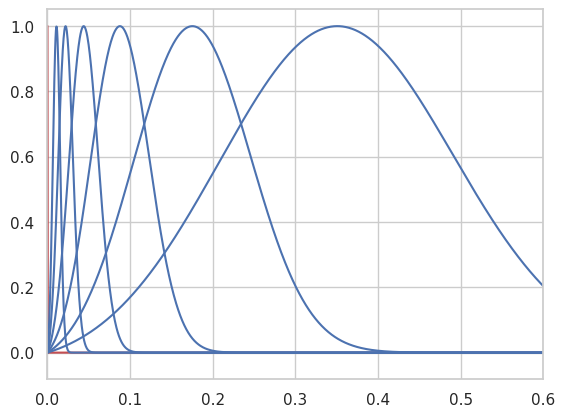

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio.scattering1d.filter_bank import scattering_filter_factory

T = 2048
J = 5
Q = (1, 1)

# Generate filter bank
phi_f, psi1_f, psi2_f = scattering_filter_factory(T, J, Q, T)
plt.plot(np.arange(T)/T, phi_f['levels'][0], 'r')
for psi_f in psi1_f:
    plt.plot(np.arange(T)/T, psi_f['levels'][0], 'b')
# Plot low-pass filter φ
#plt.figure(figsize=(10, 5))
#plt.plot(np.linspace(0, 1, len(phi_f['levels'])), phi_f['levels'], 'r', label=r'$\hat{\phi}(\omega)$')

# Plot first-order wavelets ψ₁
#for psi in psi1_f:
 #   plt.plot(np.linspace(0, 1, len(psi['levels'])), psi['levels'], 'b', alpha=0.5)

plt.xlim(0, 0.6)
#plt.xlabel(r'Normalized frequency $\omega$', fontsize=14)
#plt.ylabel(r'Filter amplitude', fontsize=14)
#plt.title(f'First-order filters (Q = {Q})', fontsize=16)
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()



In [66]:
plt.figure()
plt.plot(np.arange(T)/T, phi_f[0], 'r')
for psi_f in psi2_f:
    plt.plot(np.arange(T)/T, psi_f[0], 'b')
plt.xlim(0, 0.6)
plt.ylim(0, 1.2)
plt.xlabel(r'$\omega$', fontsize=18)
plt.ylabel(r'$\hat\psi_j(\omega)$', fontsize=18)
plt.title('Second-order filters (Q = 1)', fontsize=18)

KeyError: 0

<Figure size 640x480 with 0 Axes>

In [68]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
svc = svm.SVC(C=100, kernel='rbf', gamma=0.01, probability = True)
scaler = StandardScaler()
X = Sx_all[0:165]
#X = features.values[:,1:][0:165]
y = df_filtered.loc[:,['Hypertension']].values[0:165]
print("Shape of input and output variables data", "X:" ,X.shape, "y:" ,y.shape)
# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
scaler.fit(X_train)
svc.fit(scaler.transform(X_train), y_train.ravel())
pred = svc.predict(scaler.transform(X_test))
prob1 = svc.predict_proba(scaler.transform(X_test))
print(svc.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred, digits=4)) # Print classification report

Shape of input and output variables data X: (165, 19) y: (165, 1)
0.7235772357723578
                 precision    recall  f1-score   support

         Normal     0.8462    0.5238    0.6471        21
Prehypertension     0.6552    0.9048    0.7600        21

       accuracy                         0.7143        42
      macro avg     0.7507    0.7143    0.7035        42
   weighted avg     0.7507    0.7143    0.7035        42



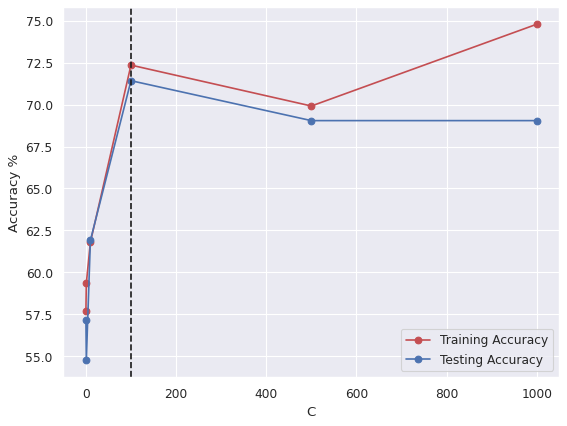

In [ ]:
c = [0.1, 1, 10, 100, 500,1000];
test_score = []
train_score = []
for i in range(0, len(c)):
  svc = svm.SVC(C=c[i], kernel='rbf', gamma=0.01, probability = True)
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  svc.fit(scaler.transform(X_train), y_train.ravel())
  pred = svc.predict(scaler.transform(X_test))
  train_score.append(svc.score(scaler.transform(X_train),y_train)*100)
  test_score.append(svc.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='0.1')

Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(C=10, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(scaler.transform(X_train), y_train.ravel())
pred_lr = clf_lr.predict(scaler.transform(X_test))
prob1_lr = clf_lr.predict_proba(scaler.transform(X_test))
print(clf_lr.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_lr,digits=4)) # Print classification report

0.6585365853658537
                 precision    recall  f1-score   support

         Normal     0.6500    0.6190    0.6341        21
Prehypertension     0.6364    0.6667    0.6512        21

       accuracy                         0.6429        42
      macro avg     0.6432    0.6429    0.6427        42
   weighted avg     0.6432    0.6429    0.6427        42



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


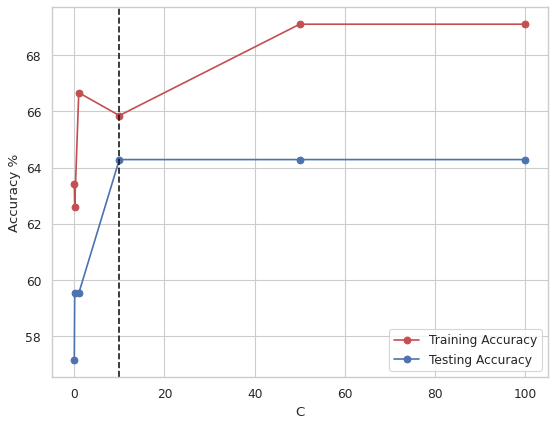

In [70]:
c = [0.01,0.1, 1, 10, 50,100];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_lr = LogisticRegression(C=c[i], class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(scaler.transform(X_train), y_train.ravel())
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  clf_lr.fit(scaler.transform(X_train), y_train.ravel())
  pred = clf_lr.predict(scaler.transform(X_test))
  train_score.append(clf_lr.score(scaler.transform(X_train),y_train)*100)
  test_score.append(clf_lr.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("C")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

Linear Discriminant Analysis

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(scaler.transform(X_train), y_train)
pred_LDA = clf_LDA.predict(scaler.transform(X_test))
prob1_LDA = clf_LDA.predict_proba(scaler.transform(X_test))
print(clf_LDA.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_LDA,digits=4)) # Print classification report

0.7073170731707317
                 precision    recall  f1-score   support

         Normal     0.5833    0.6667    0.6222        21
Prehypertension     0.6111    0.5238    0.5641        21

       accuracy                         0.5952        42
      macro avg     0.5972    0.5952    0.5932        42
   weighted avg     0.5972    0.5952    0.5932        42



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-nearest Neieghtbor

In [72]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(scaler.transform(X_train), y_train.ravel())
pred_knn = neigh.predict(scaler.transform(X_test))
prob1_knn = neigh.predict_proba(scaler.transform(X_test))
print(neigh.score(scaler.transform(X_train),y_train))
print(classification_report(y_test.ravel(), pred_knn,digits=4)) # Print classification report

0.6585365853658537
                 precision    recall  f1-score   support

         Normal     0.6250    0.7143    0.6667        21
Prehypertension     0.6667    0.5714    0.6154        21

       accuracy                         0.6429        42
      macro avg     0.6458    0.6429    0.6410        42
   weighted avg     0.6458    0.6429    0.6410        42



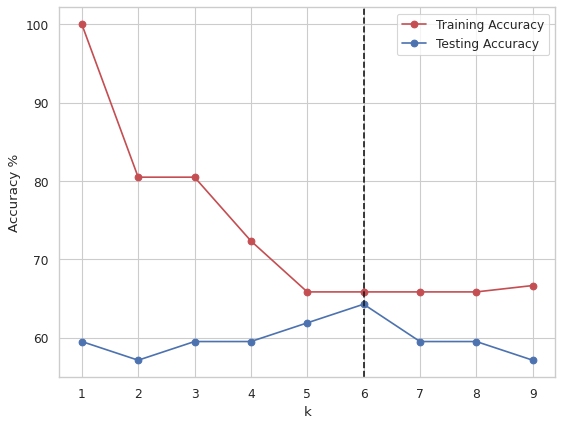

In [73]:
c = [1,2, 3, 4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  neigh = KNeighborsClassifier(n_neighbors=c[i])
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  neigh.fit(scaler.transform(X_train), y_train.ravel())
  pred = neigh.predict(scaler.transform(X_test))
  train_score.append(neigh.score(scaler.transform(X_train),y_train)*100)
  test_score.append(neigh.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("k")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

Decision Tree

In [74]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=6)
clf_dt.fit(X_train, y_train.ravel())
pred_dt = clf_dt.predict(X_test)
prob1_dt = clf_dt.predict_proba(X_test)
print(clf_dt.score(X_train,y_train))
print(classification_report(y_test.ravel(), pred_dt,digits=4)) # Print classification report

0.8292682926829268
                 precision    recall  f1-score   support

         Normal     0.5600    0.6667    0.6087        21
Prehypertension     0.5882    0.4762    0.5263        21

       accuracy                         0.5714        42
      macro avg     0.5741    0.5714    0.5675        42
   weighted avg     0.5741    0.5714    0.5675        42



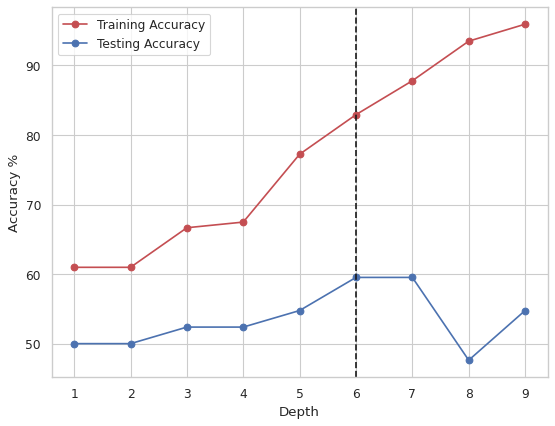

In [75]:
c = [1,2, 3, 4,5,6,7,8,9];
test_score = []
train_score = []
for i in range(0, len(c)):
  clf_dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=c[i])
  scaler = StandardScaler()
  X = Sx_all[0:165]
  #X = features.values[:,1:][0:165]
  y = df_filtered.loc[:,['Hypertension']].values[0:165]
  # Split data in train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
  scaler.fit(X_train)
  clf_dt.fit(scaler.transform(X_train), y_train.ravel())
  pred = clf_dt.predict(scaler.transform(X_test))
  train_score.append(clf_dt.score(scaler.transform(X_train),y_train)*100)
  test_score.append(clf_dt.score(scaler.transform(X_test),y_test)*100)
figure(figsize=(8, 6), dpi=80)
plt.plot(c, train_score,'ro-')
plt.plot(c, test_score,'bo-')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Depth")
plt.ylabel("Accuracy %")
plt.axvline(x=c[np.argmax(test_score)], color='k', linestyle='--', label='100')

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x2 = df_filtered[["Age(year)","BMI(kg/m^2)",'Weight(kg)']].values[0:165]
scaler2 = StandardScaler()
scaler2.fit(x2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x2, y, test_size=0.25,random_state=1) # 70% training and 30% test
svc2 = svm.SVC(C=100, kernel='rbf', gamma=0.000001,probability = True)
svc2.fit(X_train_2, y_train.ravel())
pred_2 = svc2.predict(X_test_2)
prob2 = svc2.predict_proba(X_test_2)
print(svc2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_2)) # Print classification report

0.5934959349593496
                 precision    recall  f1-score   support

         Normal       0.75      0.57      0.65        21
Prehypertension       0.65      0.81      0.72        21

       accuracy                           0.69        42
      macro avg       0.70      0.69      0.69        42
   weighted avg       0.70      0.69      0.69        42



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
# Train the model using the training sets
knn.fit(X_train_2, y_train.ravel())
#Predict Output
pred_3 = knn.predict(X_test_2)
prob3 = knn.predict_proba(X_test_2)
print(knn.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_3)) # Print classification report

0.7479674796747967
                 precision    recall  f1-score   support

         Normal       0.48      0.48      0.48        21
Prehypertension       0.48      0.48      0.48        21

       accuracy                           0.48        42
      macro avg       0.48      0.48      0.48        42
   weighted avg       0.48      0.48      0.48        42



In [ ]:
lda_clf_2 = LinearDiscriminantAnalysis()
lda_clf_2.fit(X_train_2, y_train.ravel())
pred_4 = lda_clf_2.predict(X_test_2)
prob4 = lda_clf_2.predict_proba(X_test_2)
print(lda_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_4)) # Print classification report

0.6504065040650406
                 precision    recall  f1-score   support

         Normal       0.62      0.62      0.62        21
Prehypertension       0.62      0.62      0.62        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42



In [ ]:
dt_clf_2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
dt_clf_2.fit(X_train_2, y_train.ravel())
pred_6 = dt_clf_2.predict(X_test_2)
prob6 = dt_clf_2.predict_proba(X_test_2)
print(dt_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_6)) # Print classification report

0.7073170731707317
                 precision    recall  f1-score   support

         Normal       0.53      0.48      0.50        21
Prehypertension       0.52      0.57      0.55        21

       accuracy                           0.52        42
      macro avg       0.52      0.52      0.52        42
   weighted avg       0.52      0.52      0.52        42



In [ ]:
lr_clf_2 = LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train, y_train.ravel())
lr_clf_2.fit(X_train_2, y_train.ravel())
pred_5 = lr_clf_2.predict(X_test_2)
prob5 = lr_clf_2.predict_proba(X_test_2)
print(lr_clf_2.score(X_train_2,y_train))
print(classification_report(y_test.ravel(), pred_5)) # Print classification report

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6504065040650406
                 precision    recall  f1-score   support

         Normal       0.62      0.62      0.62        21
Prehypertension       0.62      0.62      0.62        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42



In [ ]:
predicted_votes = [];
votes_normal = 0;
votes_pre = 0;
for i in range(0, len(pred)):
  if pred[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if pred_2[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred_2[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if pred_3[[i]] == 'Normal':
    votes_normal = votes_normal  + 1
  if pred_3[[i]] == 'Prehypertension':
    votes_pre = votes_pre + 1
  if votes_normal > votes_pre:
    predicted_votes.append('Normal')
  if votes_normal < votes_pre:
    predicted_votes.append('Prehypertension')
  votes_normal = 0;
  votes_pre = 0;

In [ ]:
print(classification_report(y_test.ravel(), predicted_votes))

                 precision    recall  f1-score   support

         Normal       0.65      0.52      0.58        21
Prehypertension       0.60      0.71      0.65        21

       accuracy                           0.62        42
      macro avg       0.62      0.62      0.62        42
   weighted avg       0.62      0.62      0.62        42



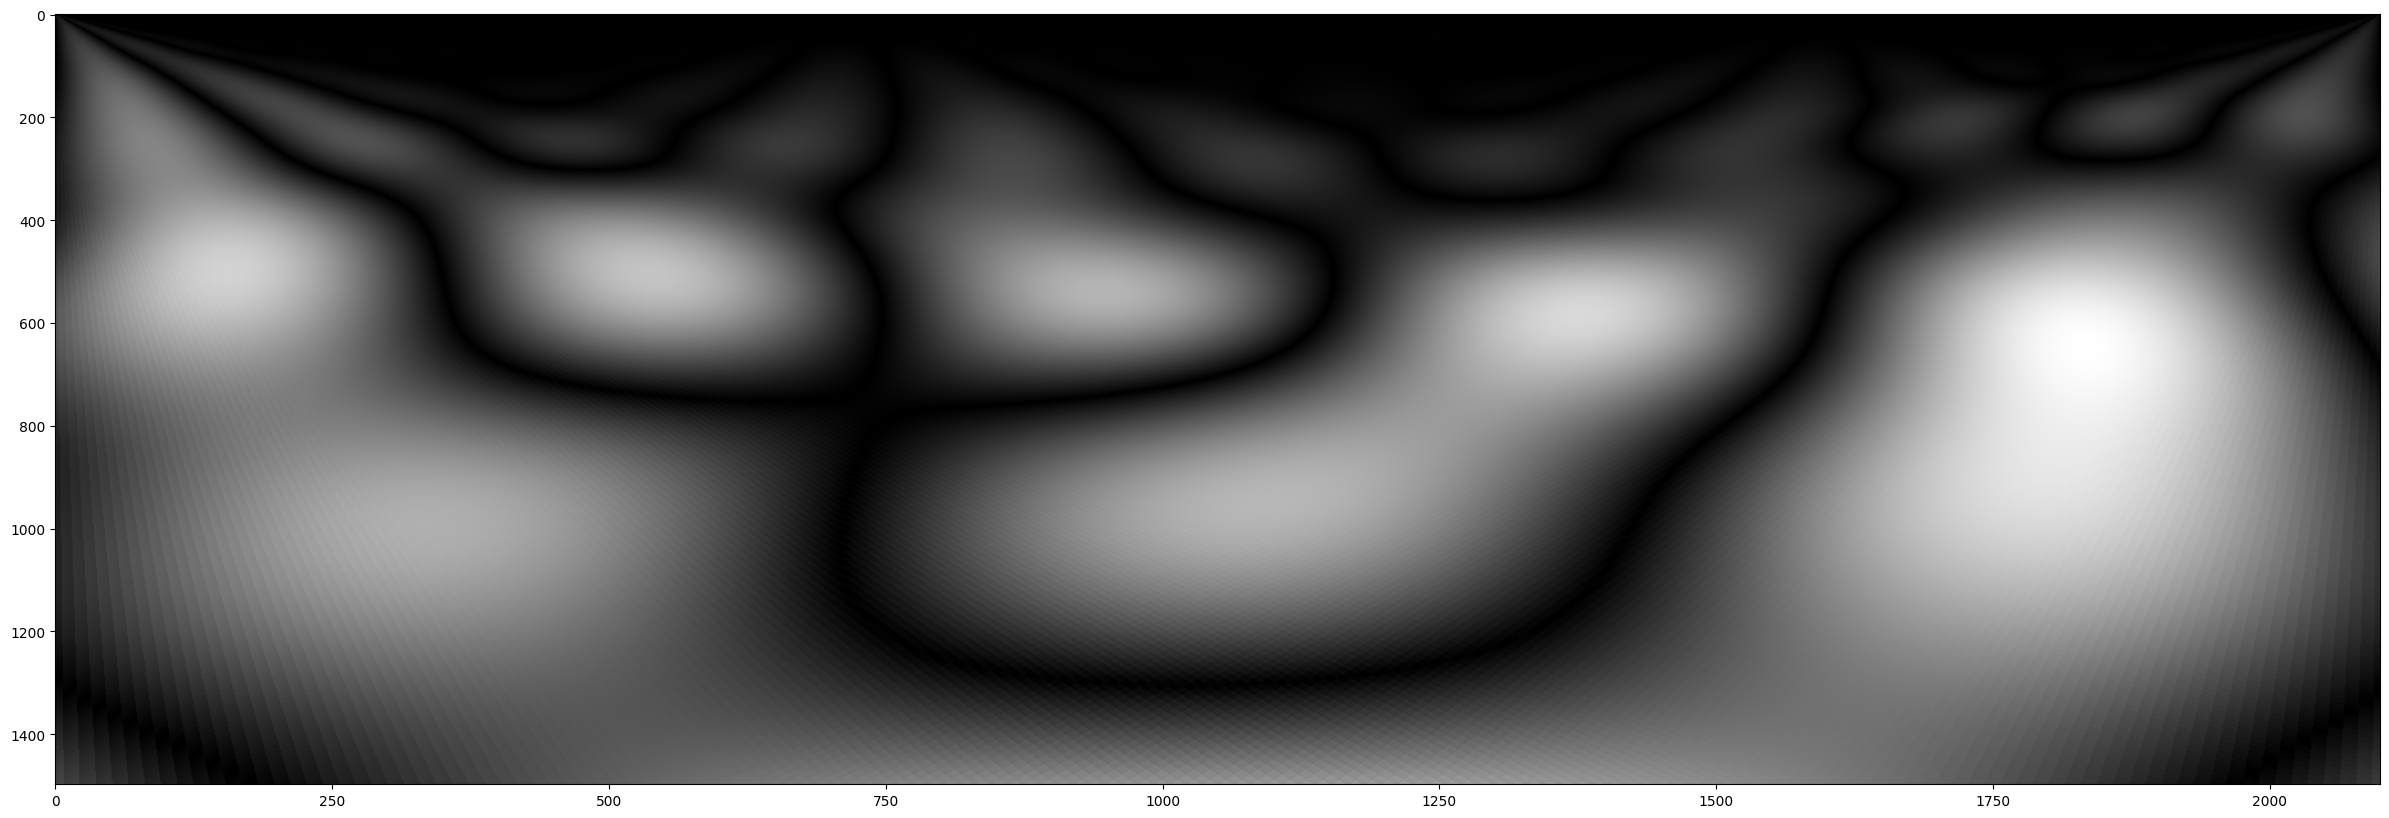

In [ ]:
#@title Hidden cell
print("This cell is initially collapsed")
import pywt
scales = range(2, 1500)
waveletname = 'gaus8'
wt = data_ppg_filtered[2]
coeff, freq = pywt.cwt(wt, scales, waveletname,sampling_period=1/1000,method='fft')
plt.imshow(abs(coeff),cmap = 'gray', aspect = 'auto')

In [ ]:
#@title Hidden cell
print("This cell is initially collapsed")
import time
start_time = time.time()
data_cwt = np.ndarray(shape=(166, 2000-1, 2100,1))
scales = range(2, 2001)
waveletname = 'cmor8-1.0'
for ii in range(0,166):
    if ii % 100 == 0:
        print(ii)
    signal = data_ppg_filtered[ii]
    coeff, freq = pywt.cwt(signal, scales, waveletname,method='fft',sampling_period=1/1000)
    coeff_ = abs(coeff[:,:2100])
    for jj in range(0,1):
        data_cwt[ii, :, :, jj] = coeff_
print("--- %s seconds ---" % (time.time() - start_time))

0


KeyboardInterrupt: 

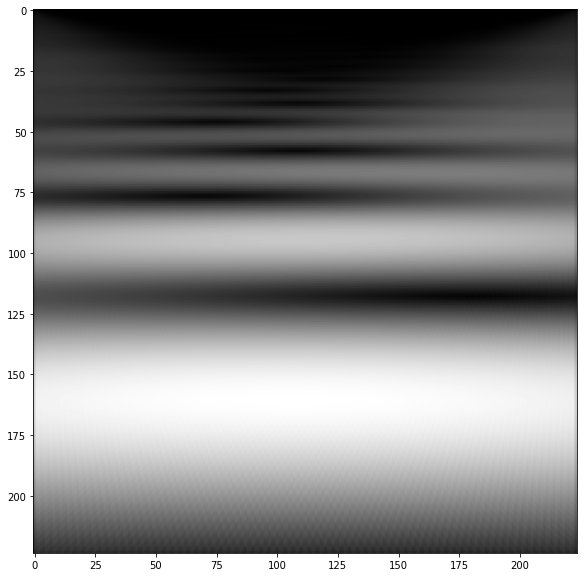

In [ ]:
#@title Hidden cell
print("This cell is initially collapsed")
from skimage.transform import resize
plt.imshow(abs(resize(data_cwt[15,:,:,0], (224, 224), mode = 'constant', anti_aliasing=True)),cmap = 'gray')

--- 5816.028245210648 seconds ---


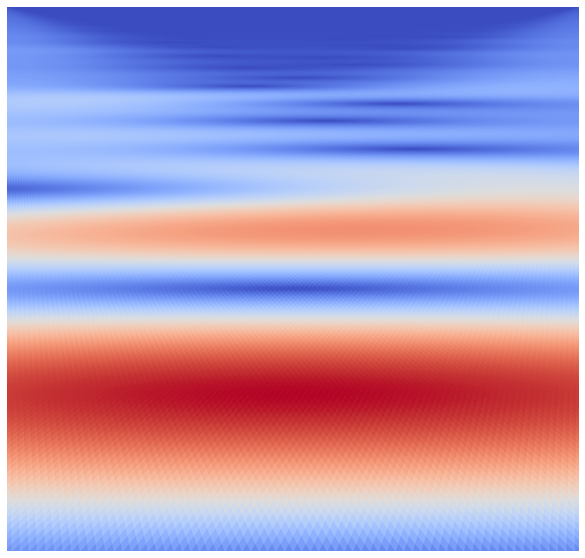

In [ ]:
#@title Hidden cell
print("This cell is initially collapsed")
start_time = time.time()
for k in range(0,166):
  plt.imshow(abs(data_cwt[k,:,:,0]),cmap = 'coolwarm')
  plt.axis('off')
  plt.savefig('/content/gdrive/MyDrive/SCALOGRAMS2'+'/'+str(k),bbox_inches='tight')
print("--- %s seconds ---" % (time.time() - start_time))